# Hoja de Trabajo No.5 <br/> Mineria de Datos 2020
## Naive Bayes
### Antonio Reyes 17273 <br/> Dieter de Wit 15146

## 1. Analisis Exploratorio

### 1.1 Preguntas a Resolver:

Debido a que nos estamos enfocando en predecir los precios de las casas, nos enfocamos en preguntas que tengan relacion con factores relevantes y medibles en relacion al precio de las casas. <br/> NOTA: No se tomara en cuenta factores como Area de Piscina, Pergolas, o amenidades que un considerable numero de casas no tiene, esto debido a que el contenido de estas amenidades se considera que en efecto incrementa el valor de las casas, lo cual es trivial analizarlo en el presente contexto.

1. Es la zona en donde se ubica la casa influyente al precio de la misma? <br/>
2. Mientras mas pies cuadrados tenga la casa, mayor su valor? <br/>
3. El que el acceso a la casa sea una calle pavimentada a una calle de terraceria tiene relevancia en el costo de la misma? <br/>
4. Como afecta la condicion general de la casa al precio? <br/>
5. Influencia del tiempo de contruccion y renovacion en el precio de la casa? <br/>
6. Como afecta la condicion exterior de la casa al precio? <br/>
7. Es el espacio alocado al sotano influyente al precio de la casa? <br/>
8. Como es el espacio total de la casa influyente al precio de la casa? <br/>
9. Es la cantidad de banos y cuartos directamente influyentes en el precio? <br/>
10. Como afecta la calidad de la cocina al precio de la casa? <br/>
11. Mientras mas pies cuadrados tenga el garage, mayor el valor de la casa?


### 1.2 Revision de la Data

In [761]:
# Importar librerias
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb

In [762]:
# Importar documento excel (Training Set)
datasetC = pd.read_csv('train.csv')
dataset = pd.read_csv('train.csv', na_values=['NA'])
dataset = dataset[['MSZoning','LotArea', 'Street', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']]
dataset

,MSZoning,LotArea,Street,OverallCond,YearBuilt,YearRemodAdd,ExterCond,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,RL,8450,Pave,5,2003,2003,TA,856,1710,2,Gd,8,548,208500
1,RL,9600,Pave,8,1976,1976,TA,1262,1262,2,TA,6,460,181500
2,RL,11250,Pave,5,2001,2002,TA,920,1786,2,Gd,6,608,223500
3,RL,9550,Pave,5,1915,1970,TA,756,1717,1,Gd,7,642,140000
4,RL,14260,Pave,5,2000,2000,TA,1145,2198,2,Gd,9,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,5,1999,2000,TA,953,1647,2,TA,7,460,175000
1456,RL,13175,Pave,6,1978,1988,TA,1542,2073,2,TA,7,500,210000
1457,RL,9042,Pave,9,1941,2006,Gd,1152,2340,2,Gd,9,252,266500
1458,RL,9717,Pave,6,1950,1996,TA,1078,1078,1,Gd,5,240,142125


In [763]:
dataset.describe()

,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,5.575342,1971.267808,1984.865753,1057.429452,1515.463699,1.565068,6.517808,472.980137,180921.195890
std,9981.264932,1.112799,30.202904,20.645407,438.705324,525.480383,0.550916,1.625393,213.804841,79442.502883
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,2.000000,0.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,1967.000000,795.750000,1129.500000,1.000000,5.000000,334.500000,129975.000000
50%,9478.500000,5.000000,1973.000000,1994.000000,991.500000,1464.000000,2.000000,6.000000,480.000000,163000.000000
75%,11601.500000,6.000000,2000.000000,2004.000000,1298.250000,1776.750000,2.000000,7.000000,576.000000,214000.000000
max,215245.000000,9.000000,2010.000000,2010.000000,6110.000000,5642.000000,3.000000,14.000000,1418.000000,755000.000000


##### Datos que pueden afectar el precio de una casa

In [764]:
# Datos Relevantes

MSZoning = dataset.iloc[:, 0].values
LotArea = dataset.iloc[:, 1].values
Street = dataset.iloc[:, 2].values
OverallCond = dataset.iloc[:, 3].values
YearBuilt = dataset.iloc[:, 4].values
YearRemodAdd = dataset.iloc[:, 5].values
ExterCond = dataset.iloc[:, 6].values
TotalBsmtSF = dataset.iloc[:, 7].values
GrLivArea = dataset.iloc[:, 8].values
FullBath = dataset.iloc[:, 9].values
KitchenQual = dataset.iloc[:, 10].values
TotRmsAbvGrd = dataset.iloc[:, 11].values
GarageArea = dataset.iloc[:, 12].values


# Lo que queremos predecir
SalePrice = dataset.iloc[:, 13].values

### 1.3 Limpieza de datos:

In [765]:
dataset.loc[dataset['MSZoning'] == 'C (all)', 'MSZoning'] = 'C'

dataset['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

# Ubicacion de la Casa (Pregunta 1)

In [766]:
figMSZoning = px.bar(x = MSZoning, y = SalePrice, color = MSZoning, labels={'x':'MSZoning'})
figMSZoning.show()

In [767]:
dataset_RL = dataset.loc[dataset['MSZoning'] == "RL"]
dataset_RM = dataset.loc[dataset['MSZoning'] == "RM"]
dataset_C = dataset.loc[dataset['MSZoning'] == "C"]
dataset_FV = dataset.loc[dataset['MSZoning'] == "FV"]
dataset_RH = dataset.loc[dataset['MSZoning'] == "RH"]

mean_RL = dataset_RL['SalePrice'].mean()
mean_RM = dataset_RM['SalePrice'].mean()
mean_C = dataset_C['SalePrice'].mean()
mean_FV = dataset_FV['SalePrice'].mean()
mean_RH = dataset_RH['SalePrice'].mean()

sales = [mean_RL, mean_RM, mean_C, mean_FV, mean_RH]
zones = ["RL", "RM", "C", "FV", "RH"]

fig = go.Figure()

fig.add_trace(go.Scatter(y = sales, x = zones,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

A raiz de esto, podemos visualizar que la cantidad de datos predominan para las casas ubicadas en 'RL',  Residential Low Density; sin embargo, las casas con un valor medio mas alto son las ubicadas en 'FV', Floating Village Residential. <br/> 
Con esto, podemos realizar la subdivision de grupos: 
* RL y FV: Caras
* RM y RH: Intermedias
* C: Economicas

In [768]:
mean_RLandFV = ((mean_RL + mean_FV)/2)
mean_RMandRH = ((mean_RH + mean_RM)/2)

print(mean_RLandFV)
print(mean_RMandRH)
print(mean_C)

202509.52816280158
128937.60263761468
74528.0


# LotArea (Pregunta 2)

In [769]:
figLotArea = px.scatter(x = LotArea, y = SalePrice, color=SalePrice, labels={'x':'LotArea', 'y':'SalePrice'})
figLotArea.show()

Se creía que el área del lote aumentaría el precio de la propiedad, pero al realizar la gráfica, puede verse que el aumento de precio en base al aumento de área es más un fenomeno. La mayoría de las casas en la base de datos poseen un área entre 1,300 - 50,000 pies cuadrados y es poco posible determinar precio de la propiedad por medio de 'LotArea'

In [770]:
dataset_lotArea = dataset.drop(dataset[dataset.LotArea > 40000].index)

LotAreaTemp = dataset_lotArea.iloc[:, 1].values
SalePriceTemp = dataset_lotArea.iloc[:, 13].values

figLotArea2 = px.scatter(x = LotAreaTemp, y = SalePriceTemp, color=SalePriceTemp, labels={'x':'LotArea', 'y':'SalePrice'})
figLotArea2.show()

Limitando nuestro dataset a los valores de 'LotArea' menores que 40,000 pies cuadrados ya se puede realizar un analisis viable.

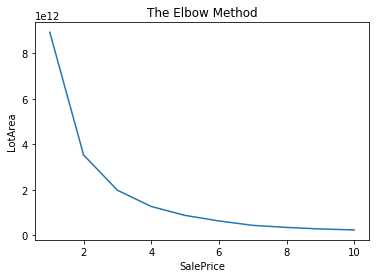

In [771]:
from sklearn.cluster import KMeans
X = dataset_lotArea.iloc[:, [1,13]].values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

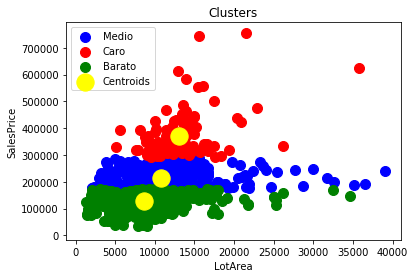

In [772]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Medio')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Caro')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Barato')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('LotArea')
plt.ylabel('SalesPrice')
plt.legend()
plt.show()

Con este modelo podemos determinar de manera rustica los limites de precio/area como los centroides: 
* LotArea > 14,000: Caro
* LotArea < 8,000: Economico
* Intermedio: cualquier valor entre Caro y Economico

In [773]:
dataset_lotCaro = dataset.loc[dataset['LotArea'] >= 14000]
dataset_lotEcono = dataset.loc[dataset['LotArea'] <= 8000]
dataset_lotInter = dataset.loc[(dataset['LotArea'] < 14000) & (dataset['LotArea'] > 8000)]


mean_lotCaro = dataset_lotCaro['SalePrice'].mean()
mean_lotEcono = dataset_lotEcono['SalePrice'].mean()
mean_lotInter = dataset_lotInter['SalePrice'].mean()

print(mean_lotCaro)
print(mean_lotInter)
print(mean_lotEcono)

250366.95857988167
186398.6034883721
142761.32482598608


# Street (Pregunta 3)

In [774]:
dataset_Pave = dataset.loc[dataset['Street'] == "Pave"]
dataset_Gravel = dataset.loc[dataset['Street'] == "Grvl"]

mean_Pavel = dataset_Pave['SalePrice'].mean()
mean_Grvl = dataset_Gravel['SalePrice'].mean()

max_Pavel = dataset_Pave['SalePrice'].max()
max_Grvl = dataset_Gravel['SalePrice'].max()

min_Pavel = dataset_Pave['SalePrice'].min()
min_Grvl = dataset_Gravel['SalePrice'].min()

sales = [mean_Pavel, mean_Grvl]
sales2 = [max_Pavel, max_Grvl]
sales3 = [min_Pavel, min_Grvl]
street = ["Pave", "Grvl"]

fig = go.Figure()

fig.add_trace(go.Scatter(y = sales, x = street,
                    mode='lines+markers',
                    name='lines+markers'))

fig.add_trace(go.Scatter(y = sales2, x = street,
                    mode='lines+markers',
                    name='lines+markers'))

fig.add_trace(go.Scatter(y = sales3, x = street,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

En terminos de la media, es dificil analizar si provee un cambio significativo o solamente se presenta por los pocos datos obtenidos de casas con calles de Terraceria. Sin embargo al acercar la grafica podemos ver que en la media la diferencia de precio es de 50mil dolares. 

# Overall Condition (Pregunta 4)

In [775]:
figOverallCond = px.scatter(x = OverallCond, y = SalePrice, color = OverallCond, labels={'x':'OverallCond', 'y':'SalePrice'})
figOverallCond.show()

In [776]:
dataset_1a4 = dataset.loc[dataset['OverallCond'] < 5]
dataset_5 = dataset.loc[dataset['OverallCond'] == 5]
dataset_6 = dataset.loc[dataset['OverallCond'] == 6]
dataset_7 = dataset.loc[dataset['OverallCond'] == 7]
dataset_8 = dataset.loc[dataset['OverallCond'] == 8]
dataset_9 = dataset.loc[dataset['OverallCond'] == 9]

mean_1a4 = dataset_1a4['SalePrice'].mean()
mean_5 = dataset_5['SalePrice'].mean()
mean_6 = dataset_6['SalePrice'].mean()
mean_7 = dataset_7['SalePrice'].mean()
mean_8 = dataset_8['SalePrice'].mean()
mean_9 = dataset_9['SalePrice'].mean()

sales = [mean_1a4, mean_5, mean_6, mean_7, mean_8, mean_9]
condition = ["1 a 4", "= 5", " = 6", " = 7", "= 8", "= 9"]

fig = go.Figure()

fig.add_trace(go.Scatter(y = sales, x = condition,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

Con el analisis de la condicion general de la casa se pueden generar los siguientes grupos:
* 1 a 4: Barato
* 6, 7 y 8: Intermedio
* 5 y 9: Caro

In [777]:
condCaro = ((mean_5 + mean_9)/2)
condInter = ((mean_6 + mean_7 + mean_8)/3)

print(condCaro)
print(condInter)
print(mean_1a4)

209575.73009633482
155919.6050619435
115729.06818181818


# YearBuilt (Pregunta 5)

In [778]:
dataset_yearBuilt = dataset.drop(dataset[dataset.YearBuilt < 1901].index)

YearBuiltTemp = dataset_yearBuilt.iloc[:, 4].values
SalePriceTemp = dataset_yearBuilt.iloc[:, 13].values

figYearBuilt = px.scatter(x = YearBuiltTemp, y = SalePriceTemp, labels={'x':'YearBuilt', 'y':'SalePrice'})
figYearBuilt.show()

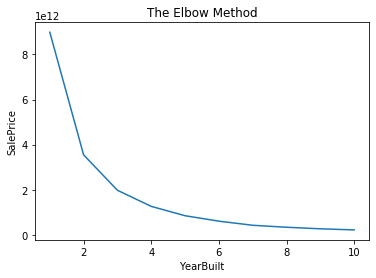

In [779]:
from sklearn.cluster import KMeans
X = dataset_yearBuilt.iloc[:, [4,13]].values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

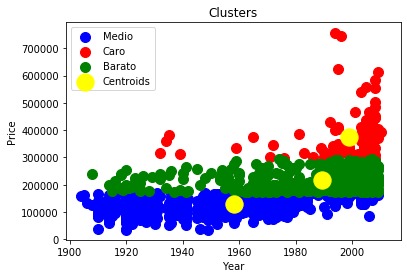

In [780]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Medio')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Caro')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Barato')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Con este modelo podemos determinar de manera rustica los limites de precio/YearBuilt como los centroides: 
* YearBuilt > 2000: Caro
* YearBuilt < 1960: Economico
* Intermedio: cualquier valor entre Caro y Economico

In [781]:
dataset_yearBCaro = dataset.loc[dataset['YearBuilt'] >= 2000]
dataset_yearBEcono = dataset.loc[dataset['YearBuilt'] <= 1960]
dataset_yearBInter = dataset.loc[(dataset['YearBuilt'] < 2000) & (dataset['LotArea'] > 1960)]


mean_yearBCaro = dataset_yearBCaro['SalePrice'].mean()
mean_yearBEcono = dataset_yearBEcono['SalePrice'].mean()
mean_yearBInter = dataset_yearBInter['SalePrice'].mean()

print(mean_yearBCaro)
print(mean_yearBInter)
print(mean_yearBEcono)

242439.162371134
159995.8501908397
136143.77290836655


# YearRemodAdd  (Pregunta 5)

In [782]:
dataset_yearRemod = dataset.drop(dataset[dataset.YearRemodAdd < 1951].index)

YearRemodTemp = dataset_yearRemod.iloc[:, 5].values
SalePriceTemp = dataset_yearRemod.iloc[:, 13].values

figYearRemodAdd = px.scatter(x = YearRemodTemp, y = SalePriceTemp, labels={'x':'YearRemodAdd', 'y':'SalePrice'})
figYearRemodAdd.show()

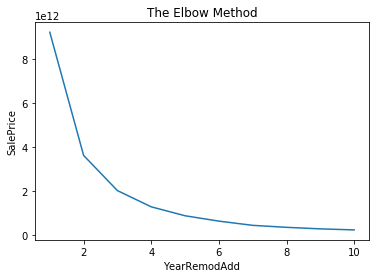

In [783]:
from sklearn.cluster import KMeans
X = dataset.iloc[:, [5,13]].values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

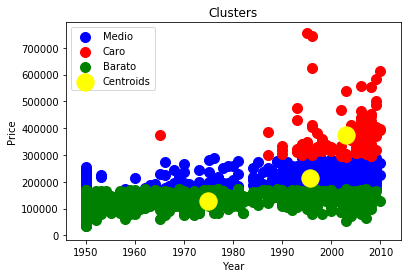

In [784]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Medio')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Caro')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Barato')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Con este modelo podemos determinar de manera rustica los limites de precio/YearRemod como los centroides: 
* YearRemod < 2002: Caro
* YearRemod > 1975: Economico
* Intermedio: cualquier valor entre Caro y Economico

In [785]:
dataset_yearRCaro = dataset.loc[dataset['YearRemodAdd'] >= 2002]
dataset_yearREcono = dataset.loc[dataset['YearRemodAdd'] <= 1975]
dataset_yearRInter = dataset.loc[(dataset['YearRemodAdd'] < 2002) & (dataset['LotArea'] > 1975)]


mean_yearRCaro = dataset_yearRCaro['SalePrice'].mean()
mean_yearREcono = dataset_yearREcono['SalePrice'].mean()
mean_yearRInter = dataset_yearRInter['SalePrice'].mean()

print(mean_yearRCaro)
print(mean_yearRInter)
print(mean_yearREcono)

223569.90336134454
161684.27442827442
131421.2885771543


# External Condition (Pregunta 6)

In [786]:
figExterCond = px.scatter(x = ExterCond, y = SalePrice, color = OverallCond, labels={'x':'ExterCond', 'y':'SalePrice'})
figExterCond.show()

In [787]:
dataset_TA = dataset.loc[dataset['ExterCond'] == "TA"]
dataset_Gd = dataset.loc[dataset['ExterCond'] == "Gd"]
dataset_Fa = dataset.loc[dataset['ExterCond'] == "Fa"]
dataset_Ex = dataset.loc[dataset['ExterCond'] == "Ex"]

mean_TA = dataset_TA['SalePrice'].mean()
mean_Gd = dataset_Gd['SalePrice'].mean()
mean_Fa = dataset_Fa['SalePrice'].mean()
mean_Ex = dataset_Ex['SalePrice'].mean()

sales = [mean_Fa, mean_TA, mean_Gd, mean_Ex]
condition = ["Fa", "TA", "Gd", "Ex"]

fig = go.Figure()

fig.add_trace(go.Scatter(y = sales, x = condition,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

Con el analisis de la condicion general de la casa se pueden generar los siguientes grupos:
* Fa: Barato
* Gd: Intermedio
* TA, Ex: Caro

In [788]:
condsCaro = ((mean_TA + mean_Ex)/2)

print(condsCaro)
print(mean_Gd)
print(mean_Fa)

192684.1147945918
168897.5684931507
102595.14285714286


# Espacio total de la Casa (Pregunta 8)

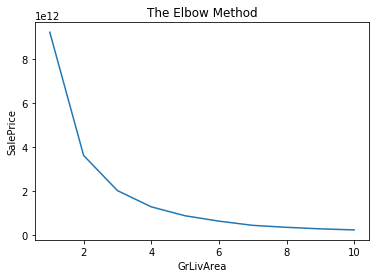

In [789]:
from sklearn.cluster import KMeans
X = dataset.iloc[:, [8,13]].values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

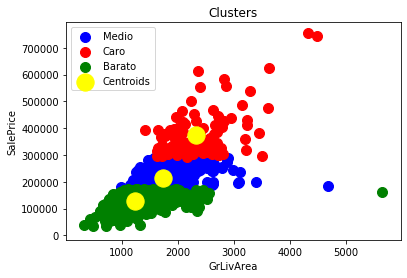

In [790]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Medio')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Caro')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Barato')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

Con este modelo podemos determinar de manera rustica los limites de precio/GrLivArea como los centroides: 
* GrLivArea < 2200: Caro
* GrLivArea > 1100: Economico
* Intermedio: cualquier valor entre Caro y Economico

In [791]:
dataset_livCaro = dataset.loc[dataset['GrLivArea'] >= 2200]
dataset_livEcono = dataset.loc[dataset['GrLivArea'] <= 1100]
dataset_livInter = dataset.loc[(dataset['GrLivArea'] < 2200) & (dataset['LotArea'] > 1100)]


mean_livCaro = dataset_livCaro['SalePrice'].mean()
mean_livEcono = dataset_livEcono['SalePrice'].mean()
mean_livInter = dataset_livInter['SalePrice'].mean()

print(mean_livCaro)
print(mean_livInter)
print(mean_livEcono)

298036.2700729927
168793.63340891912
117392.19879518072


## Asignacion de rangos:

In [792]:
Range_Expensive = ((mean_livCaro + mean_yearRCaro + mean_yearBCaro + condCaro + mean_lotCaro + mean_RLandFV)/7)
Range_Intermediate = ((mean_livInter + mean_yearRInter + mean_yearBInter + condInter + mean_lotInter + mean_RMandRH)/7)
Range_Economic = ((mean_livEcono + mean_yearREcono + mean_yearBEcono + mean_1a4 + mean_lotEcono + mean_C)/7)

print(Range_Expensive)
print(Range_Intermediate)
print(Range_Economic)

203785.36466349848
137389.93845942337
102567.95046978655


In [793]:
# 1 Economic
# 2 Intermediate
# 3 Expensive
dataset.loc[dataset['SalePrice'] <= 117224, 'SalePrice'] = 1
dataset.loc[(dataset['SalePrice'] > 117224) & (dataset['SalePrice'] < 231311), 'SalePrice'] = 2
dataset.loc[dataset['SalePrice'] >= 231311, 'SalePrice'] = 3

# Naive Bayes 

In [794]:
naive = dataset

naive=naive[[
    "MSZoning",
    "LotArea",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "GrLivArea",
    "SalePrice"
]].dropna(axis=0, how='any')

In [795]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import time

naive["MSZoning"]=np.where(naive["MSZoning"]=="RL",0,
                                  np.where(naive["MSZoning"]=="RM",1,
                                           np.where(naive["MSZoning"]=="C",2,
                                                    np.where(naive["MSZoning"]=="FV",3,4)
                                                   )
                                          )
                                 )

naive

,MSZoning,LotArea,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,SalePrice
0,0,8450,5,2003,2003,1710,2
1,0,9600,8,1976,1976,1262,2
2,0,11250,5,2001,2002,1786,2
3,0,9550,5,1915,1970,1717,2
4,0,14260,5,2000,2000,2198,3
...,...,...,...,...,...,...,...
1455,0,7917,5,1999,2000,1647,2
1456,0,13175,6,1978,1988,2073,2
1457,0,9042,9,1941,2006,2340,3
1458,0,9717,6,1950,1996,1078,2


In [796]:
gnb = GaussianNB()

used_features =[
    "MSZoning",
    "LotArea",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "GrLivArea"
]

# Split dataset in training and test datasets
X_train, X_test = train_test_split(naive, test_size=0.5, random_state=int(time.time()))

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["SalePrice"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["SalePrice"] != y_pred).sum(),
          100*(1-(X_test["SalePrice"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 730 points : 193, performance 73.56%


In [820]:
naive.describe()

,MSZoning,LotArea,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.340411,10516.828082,5.575342,1971.267808,1984.865753,1515.463699,2.038356
std,0.798309,9981.264932,1.112799,30.202904,20.645407,525.480383,0.595765
min,0.000000,1300.000000,1.000000,1872.000000,1950.000000,334.000000,1.000000
25%,0.000000,7553.500000,5.000000,1954.000000,1967.000000,1129.500000,2.000000
50%,0.000000,9478.500000,5.000000,1973.000000,1994.000000,1464.000000,2.000000
75%,0.000000,11601.500000,6.000000,2000.000000,2004.000000,1776.750000,2.000000
max,4.000000,215245.000000,9.000000,2010.000000,2010.000000,5642.000000,3.000000


## Probabilidad de que las Casas sean Caras, Intermedias o Baratas:

In [819]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

used_features1 =["LotArea"]
used_features2 =["OverallCond"]
used_features3 =["YearBuilt"]
used_features4 =["YearRemodAdd"]
used_features5 =["GrLivArea"]

y_pred = gnb.fit(X_train[used_features1].values, X_train["SalePrice"]).predict(X_test[used_features1])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["SalePrice"] != y_pred).sum(),
          100*(1-(X_test["SalePrice"] != y_pred).sum()/X_test.shape[0])
))

print("Desviacion Estandar Casas Baratas: {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Desviacion Estandar Casas Intermedias: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Desviacion Estandar Casas Caras: {:05.2f}".format(np.sqrt(gnb.sigma_)[2][0]))
print("Media Casas Baratas: {:05.2f}".format(gnb.theta_[0][0]))
print("Media Casas Intermedias: {:05.2f}".format(gnb.theta_[1][0]))
print("Media Casas Caras: {:05.2f}".format(gnb.theta_[2][0]))

Number of mislabeled points out of a total 730 points : 257, performance 64.79%
Desviacion Estandar Casas Baratas: 3234.85
Desviacion Estandar Casas Intermedias: 8554.47
Desviacion Estandar Casas Caras: 23228.33
Media Casas Baratas: 7582.43
Media Casas Intermedias: 9845.01
Media Casas Caras: 16723.07


En la prediccion anterior se pudo apreciar rangos para AREA DEL LOTE para los 3 rangos de precios:
* Una casa Cara tendria un area media de 16,723 y una desviacion estandar de 23,228 (un poco fuera de lo comun, no contempla las casas con mayor area y contempla rangos negativos)
* Una casa Intermedia tendria un area media de 9,845 y una desviacion estandar de 8,554
* Una casa Barata tendria un area media de 7,582 y una desviacion estandar de 3,234 (tampoco contempla los valores bajos de area)

In [821]:
y_pred = gnb.fit(X_train[used_features2].values, X_train["SalePrice"]).predict(X_test[used_features2])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["SalePrice"] != y_pred).sum(),
          100*(1-(X_test["SalePrice"] != y_pred).sum()/X_test.shape[0])
))

print("Desviacion Estandar Casas Baratas: {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Desviacion Estandar Casas Intermedias: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Desviacion Estandar Casas Caras: {:05.2f}".format(np.sqrt(gnb.sigma_)[2][0]))
print("Media Casas Baratas: {:05.2f}".format(gnb.theta_[0][0]))
print("Media Casas Intermedias: {:05.2f}".format(gnb.theta_[1][0]))
print("Media Casas Caras: {:05.2f}".format(gnb.theta_[2][0]))

Number of mislabeled points out of a total 730 points : 255, performance 65.07%
Desviacion Estandar Casas Baratas: 01.56
Desviacion Estandar Casas Intermedias: 01.07
Desviacion Estandar Casas Caras: 00.94
Media Casas Baratas: 05.17
Media Casas Intermedias: 05.69
Media Casas Caras: 05.38


En la prediccion anterior se pudo apreciar rangos para CONDICION GENERAL DE LA CASA para los 3 rangos de precios:
* Una casa Cara tendria una condicion general de 5.38 y una desviacion estandar de 0.94 
* Una casa Intermedia tendria una condicion general de 5.69 y una desviacion estandar de 1.07 (Esto significa que la condicion general afecta poco al precio de INTERMEDIO a CARO)
* Una casa Barata tendria una condicion general de 5.17 y una desviacion estandar de 1.56 (Tampoco hay mucha diferencia de condicion hacia las BARATAS, o se tiene pocos datos de casas en malas condiciones)

In [824]:
y_pred = gnb.fit(X_train[used_features3].values, X_train["SalePrice"]).predict(X_test[used_features3])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["SalePrice"] != y_pred).sum(),
          100*(1-(X_test["SalePrice"] != y_pred).sum()/X_test.shape[0])
))

print("Desviacion Estandar Casas Baratas: {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Desviacion Estandar Casas Intermedias: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Desviacion Estandar Casas Caras: {:05.2f}".format(np.sqrt(gnb.sigma_)[2][0]))
print("Media Casas Baratas: {:05.2f}".format(gnb.theta_[0][0]))
print("Media Casas Intermedias: {:05.2f}".format(gnb.theta_[1][0]))
print("Media Casas Caras: {:05.2f}".format(gnb.theta_[2][0]))

Number of mislabeled points out of a total 730 points : 259, performance 64.52%
Desviacion Estandar Casas Baratas: 22.57
Desviacion Estandar Casas Intermedias: 27.61
Desviacion Estandar Casas Caras: 21.07
Media Casas Baratas: 1938.89
Media Casas Intermedias: 1972.36
Media Casas Caras: 1993.74


Este analisis si nos da un poco mas de segregacion para CONSTRUCCION, Mucho mas en los rangos de Barato y Caro 
* casas construidas entre 1906 y 1960 tienden a ser baratas
* entre 1945 y 1999 tienden a ser de precio Intermedio
* entre 1972 y 2014 tienden a ser Caras 

In [825]:
y_pred = gnb.fit(X_train[used_features5].values, X_train["SalePrice"]).predict(X_test[used_features5])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["SalePrice"] != y_pred).sum(),
          100*(1-(X_test["SalePrice"] != y_pred).sum()/X_test.shape[0])
))

print("Desviacion Estandar Casas Baratas: {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Desviacion Estandar Casas Intermedias: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Desviacion Estandar Casas Caras: {:05.2f}".format(np.sqrt(gnb.sigma_)[2][0]))
print("Media Casas Baratas: {:05.2f}".format(gnb.theta_[0][0]))
print("Media Casas Intermedias: {:05.2f}".format(gnb.theta_[1][0]))
print("Media Casas Caras: {:05.2f}".format(gnb.theta_[2][0]))

Number of mislabeled points out of a total 730 points : 214, performance 70.68%
Desviacion Estandar Casas Baratas: 308.71
Desviacion Estandar Casas Intermedias: 429.22
Desviacion Estandar Casas Caras: 486.78
Media Casas Baratas: 1069.07
Media Casas Intermedias: 1438.56
Media Casas Caras: 2118.38


Este tambien es de los mas representativos, este para AREA DE VIVIENDA, y el que mejor porcentaje de prediccio tuvo:
* Una casa cara tiene una media DE 2,118 y una desviacion estandar de 486
* Una intermedia tiene una media de 1,538 con desviacion de 486
* Una casa barata tiene media de 1,069 con desviacion de 308

# Comparacion con Arboles y Random Forest

* Velocidad y tiempo de ejecucion: El mas lento es Random Forest, que tambien fue el el que tuvo el mejor porcentaje de prediccion. SIn embargo, ni se pudieron visualizar las graficas por la cantidad de datos que carga el modelo en memoria.
* En prediccion Naive Bayes es decente para segregara y encontrar un rango en  donde se puede identificar el precio de la casa segun el atributo, no es muy exacto pero si provee un headstart que puede ser pulido con Arboles de decision y Redes Neuronales.